['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


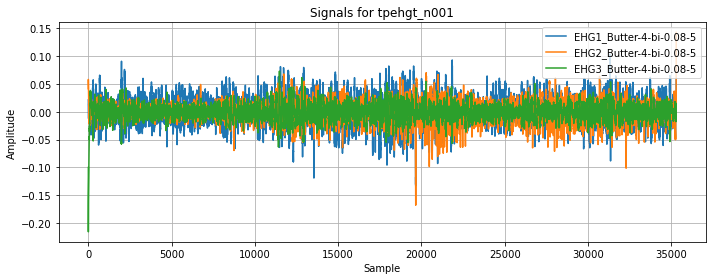

['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


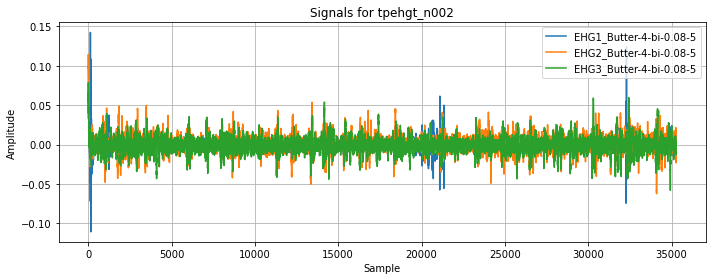

['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


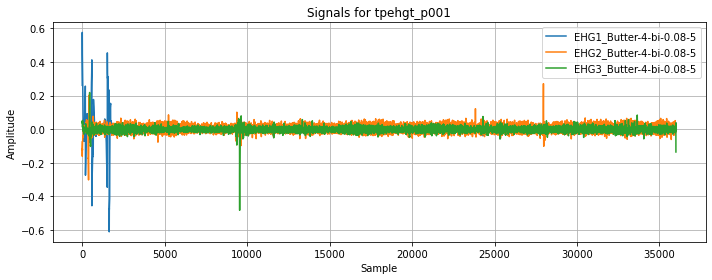

['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


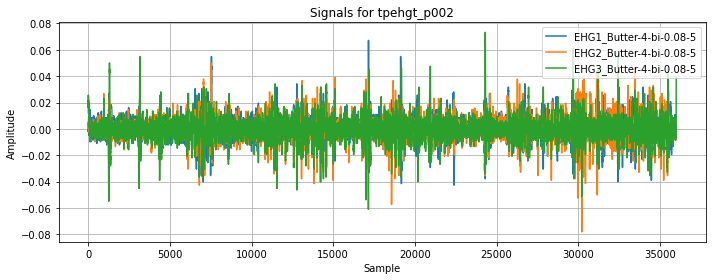

['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


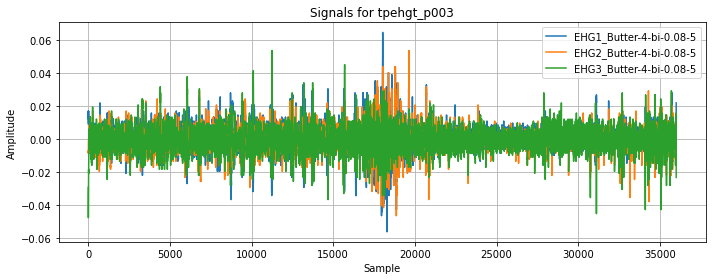

['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


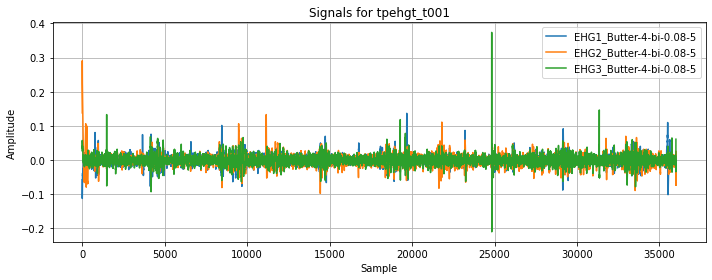

['EHG1', 'EHG1_Butter-4-bi-0.08-5', 'EHG2', 'EHG2_Butter-4-bi-0.08-5', 'EHG3', 'EHG3_Butter-4-bi-0.08-5', 'TOCO', 'TOCO_Butter-4-bi-0.08-5']


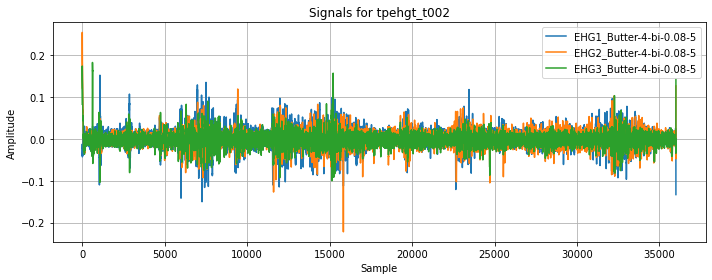

In [2]:
import wfdb
import matplotlib.pyplot as plt

# list of record names
record_names = ['tpehgt_n001', 'tpehgt_n002', 'tpehgt_p001','tpehgt_p002','tpehgt_p003','tpehgt_t001','tpehgt_t002']  

# Looping through each record name
for record_name in record_names:
    # Reading the data
    signals, fields = wfdb.rdsamp(record_name)

    signal_labels = fields['sig_name']

    # Plotting all the signals for the current record
    plt.figure(figsize=(10, 4))
    for i in [1,3,5]:
        plt.plot(signals[:, i], label=signal_labels[i])
    print(signal_labels)
    plt.title(f'Signals for {record_name}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


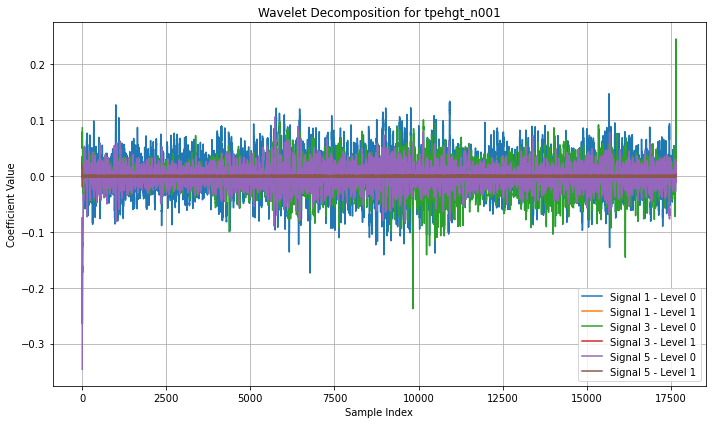

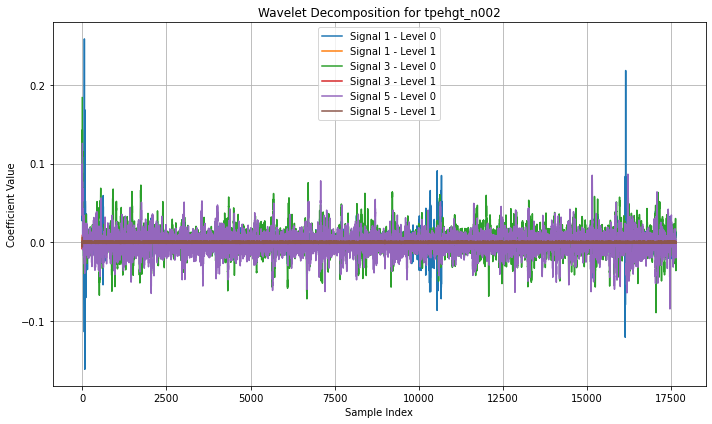

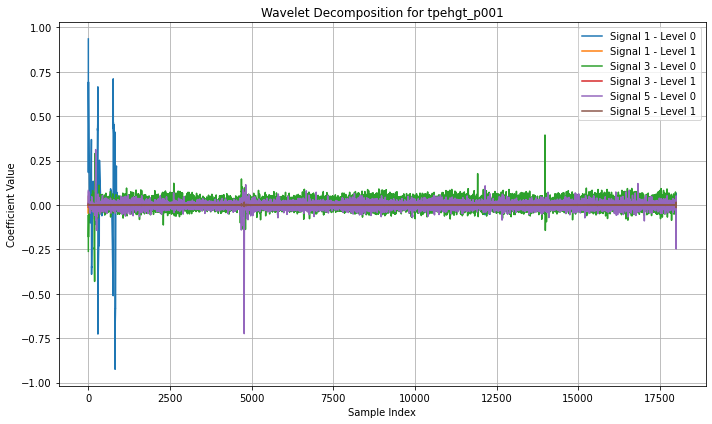

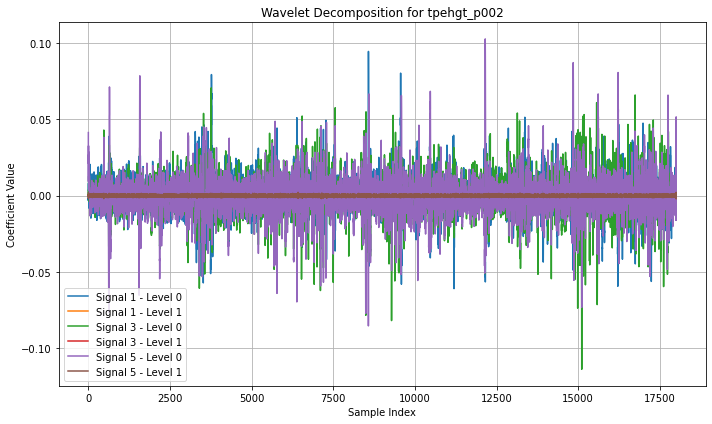

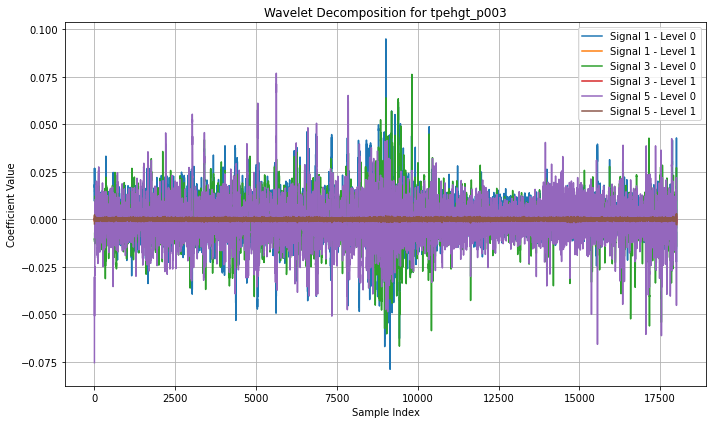

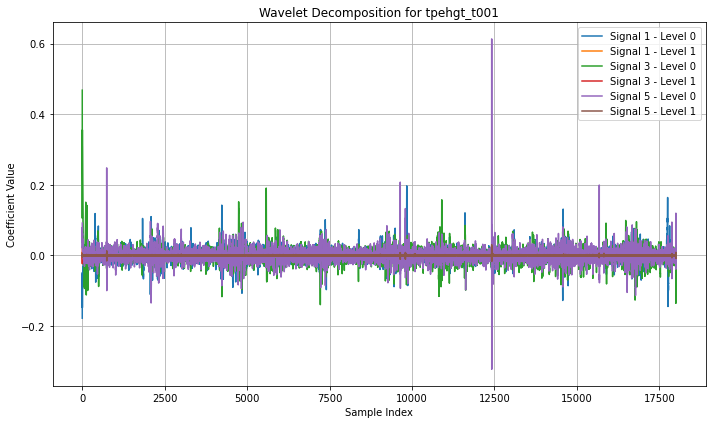

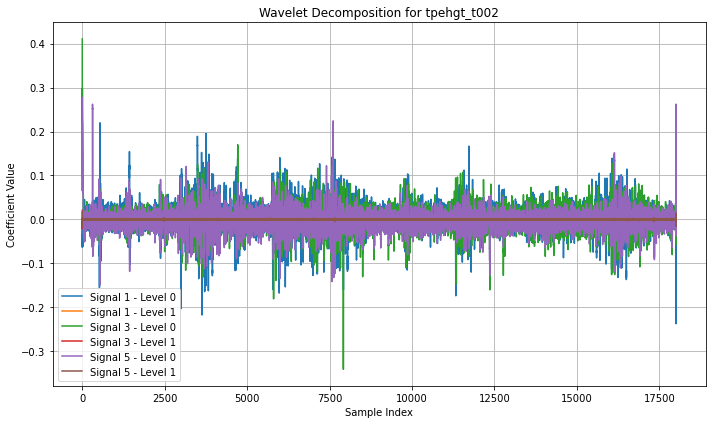

In [3]:
import wfdb
import matplotlib.pyplot as plt
import pywt


record_names = ['tpehgt_n001', 'tpehgt_n002', 'tpehgt_p001', 'tpehgt_p002', 'tpehgt_p003', 'tpehgt_t001', 'tpehgt_t002']


for record_name in record_names:
    # Load the data
    signals, fields = wfdb.rdsamp(record_name)

    signal_labels = fields['sig_name']

    # wavelet decomposition to ehg signal
    plt.figure(figsize=(10, 6))
    for i in [1, 3, 5]:  
        if i < signals.shape[1]:  
            coeffs = pywt.wavedec(signals[:, i], "bior3.3", level=1)  # Decomposing into 2 levels
            for j, coef in enumerate(coeffs):
                plt.plot(coef, label=f'Signal {i} - Level {j}')

    plt.title(f'Wavelet Decomposition for {record_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<IPython.core.display.Javascript object>

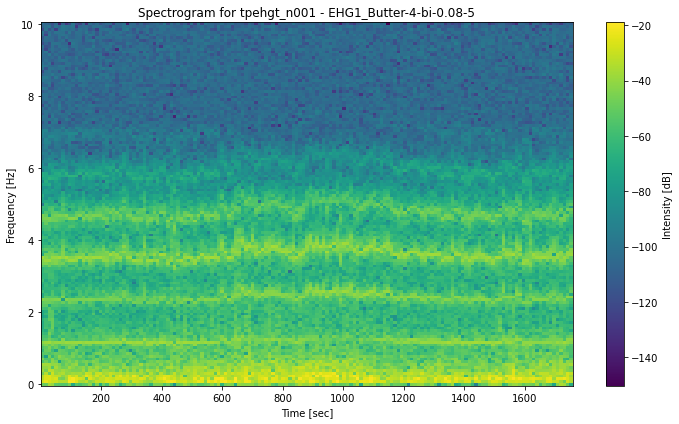

<IPython.core.display.Javascript object>

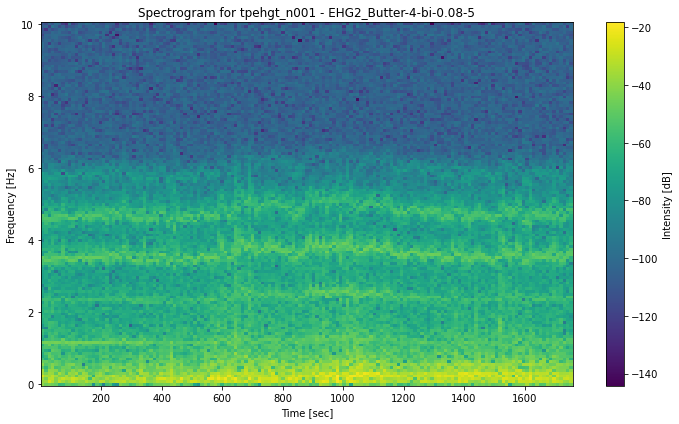

<IPython.core.display.Javascript object>

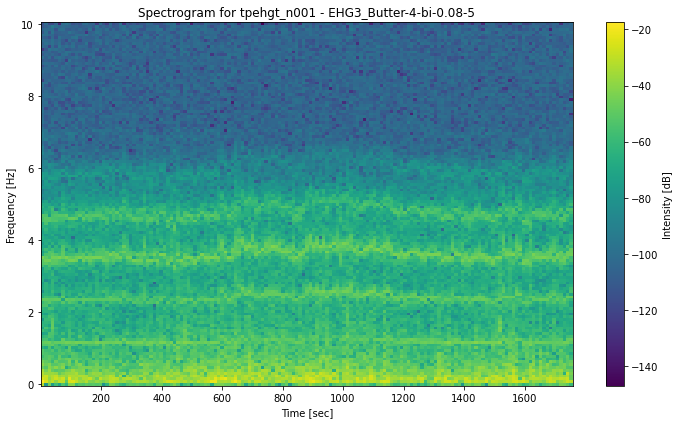

<IPython.core.display.Javascript object>

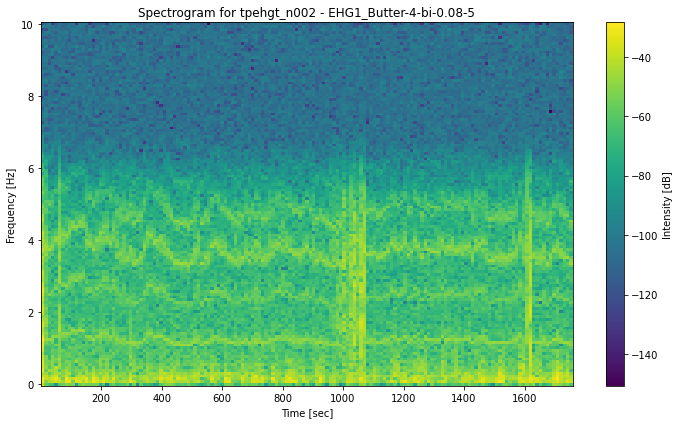

<IPython.core.display.Javascript object>

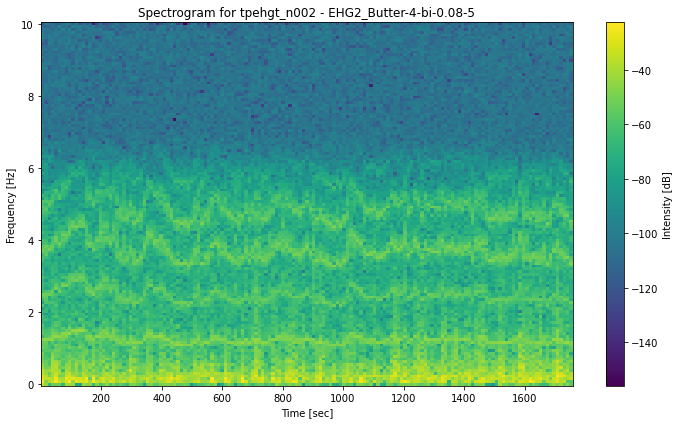

<IPython.core.display.Javascript object>

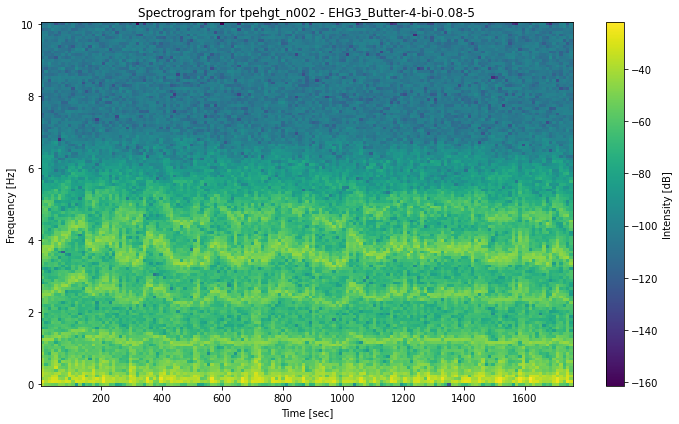

<IPython.core.display.Javascript object>

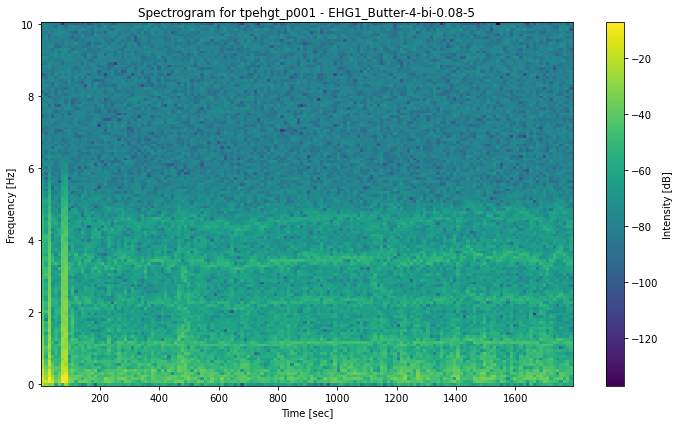

<IPython.core.display.Javascript object>

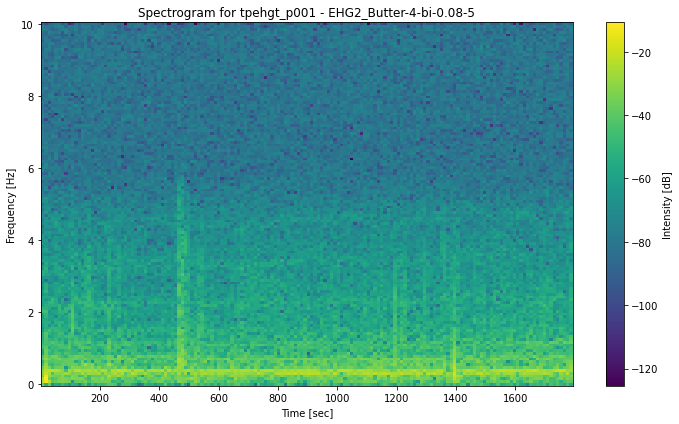

<IPython.core.display.Javascript object>

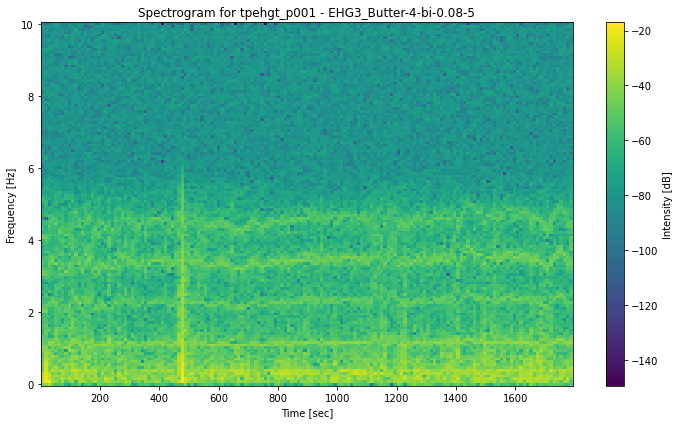

<IPython.core.display.Javascript object>

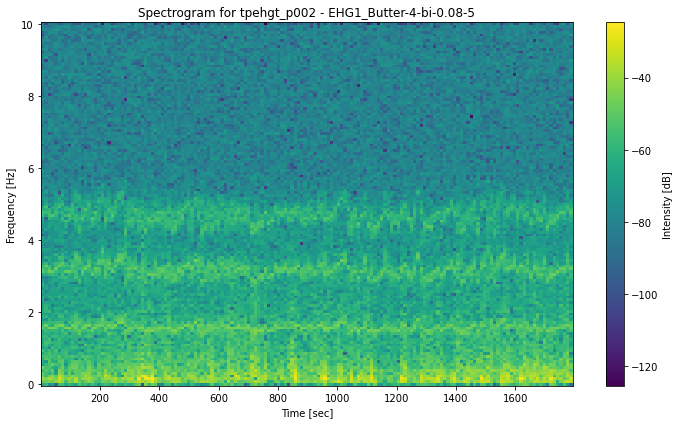

<IPython.core.display.Javascript object>

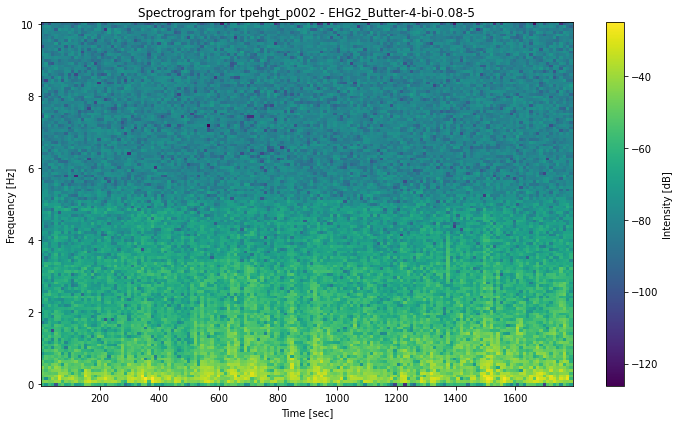

<IPython.core.display.Javascript object>

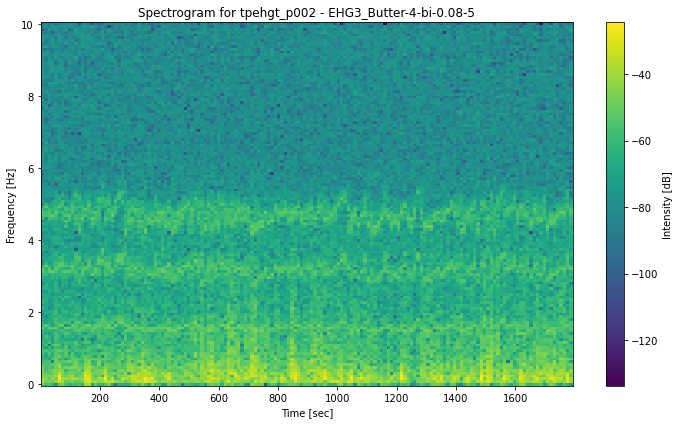

<IPython.core.display.Javascript object>

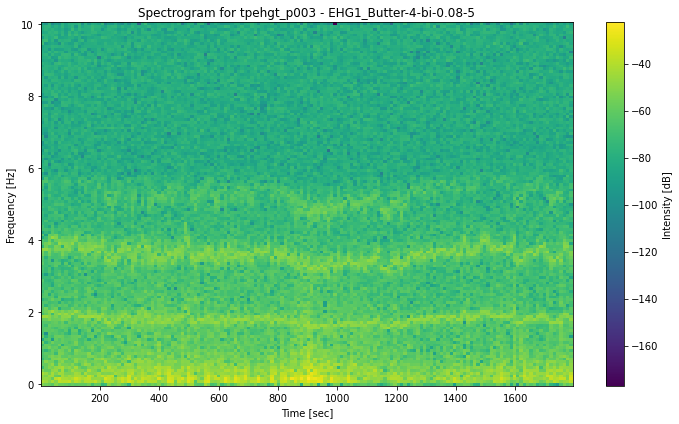

<IPython.core.display.Javascript object>

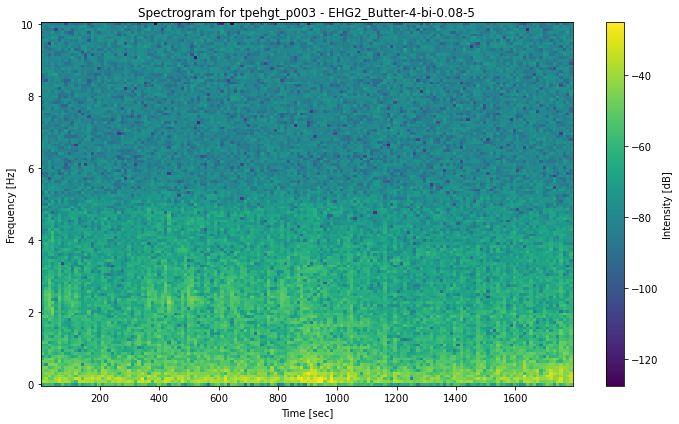

<IPython.core.display.Javascript object>

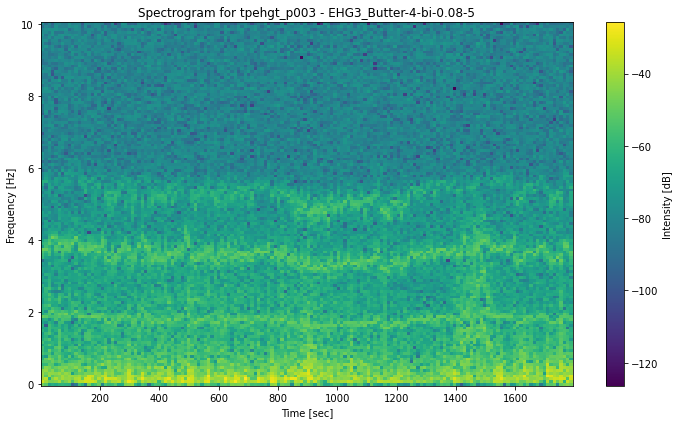

<IPython.core.display.Javascript object>

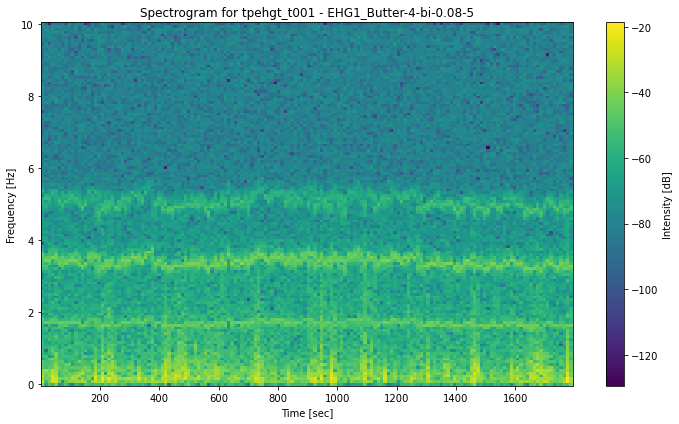

<IPython.core.display.Javascript object>

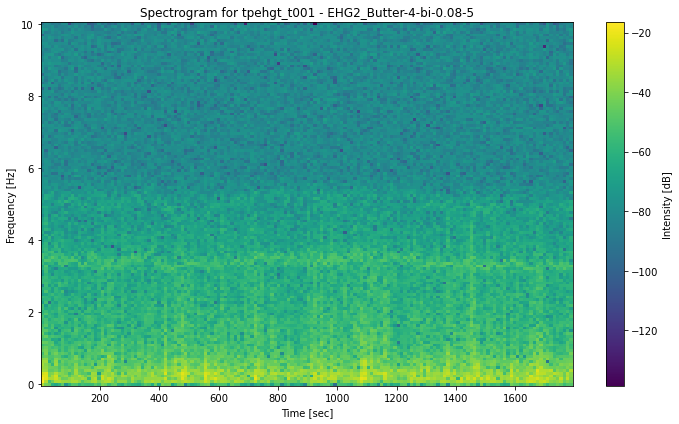

<IPython.core.display.Javascript object>

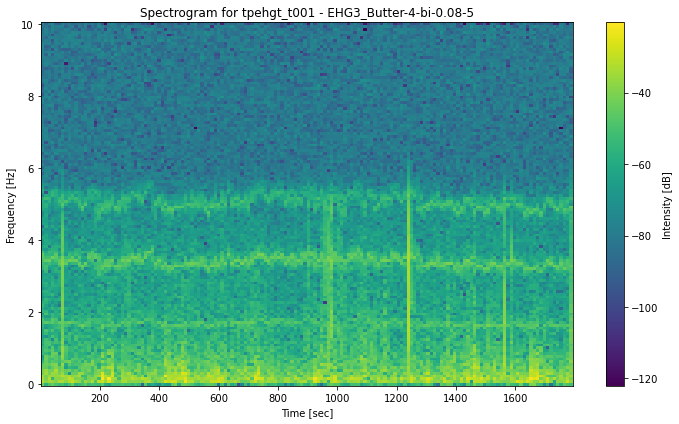

<IPython.core.display.Javascript object>

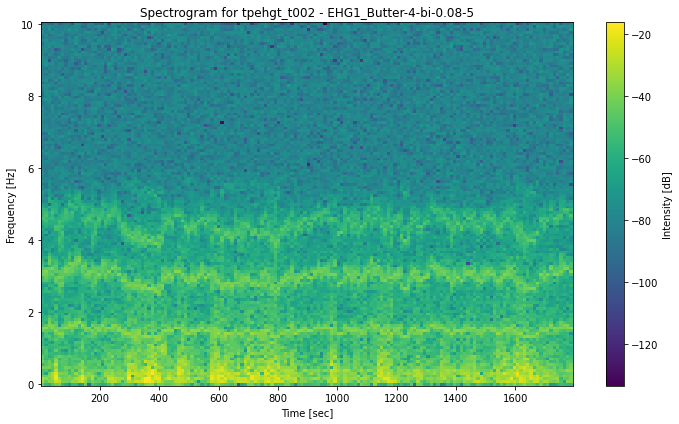

<IPython.core.display.Javascript object>

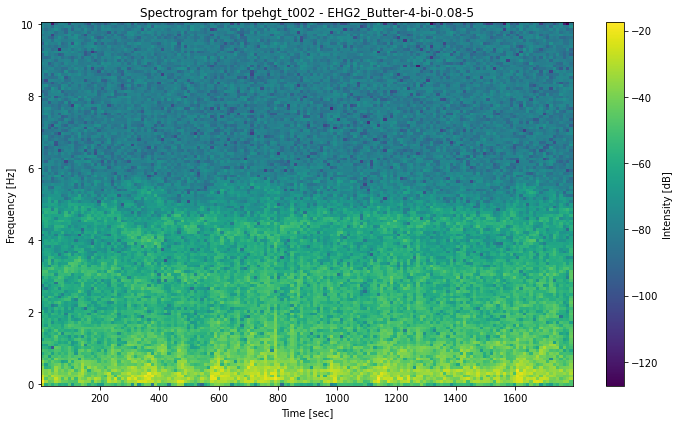

<IPython.core.display.Javascript object>

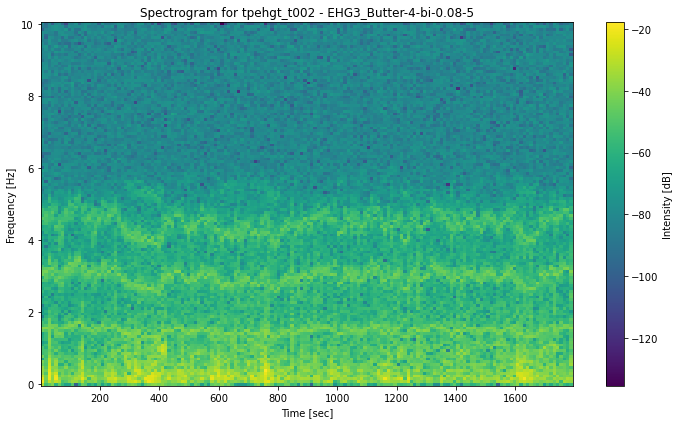

In [4]:
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pywt
for record_name in record_names:
    # Read the data
    signals, fields = wfdb.rdsamp(record_name)
    signal_labels = fields['sig_name']

    # Spectrograms for specific signals
    for i in [1, 3, 5]:  
        if i<signals.shape[1]:  
            f, t, Sxx = spectrogram(signals[:, i], fs=fields['fs'])
            plt.figure(figsize=(10, 6))
            plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
            plt.colorbar(label='Intensity [dB]')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.title(f'Spectrogram for {record_name} - {signal_labels[i]}')
            plt.tight_layout()
            plt.show()

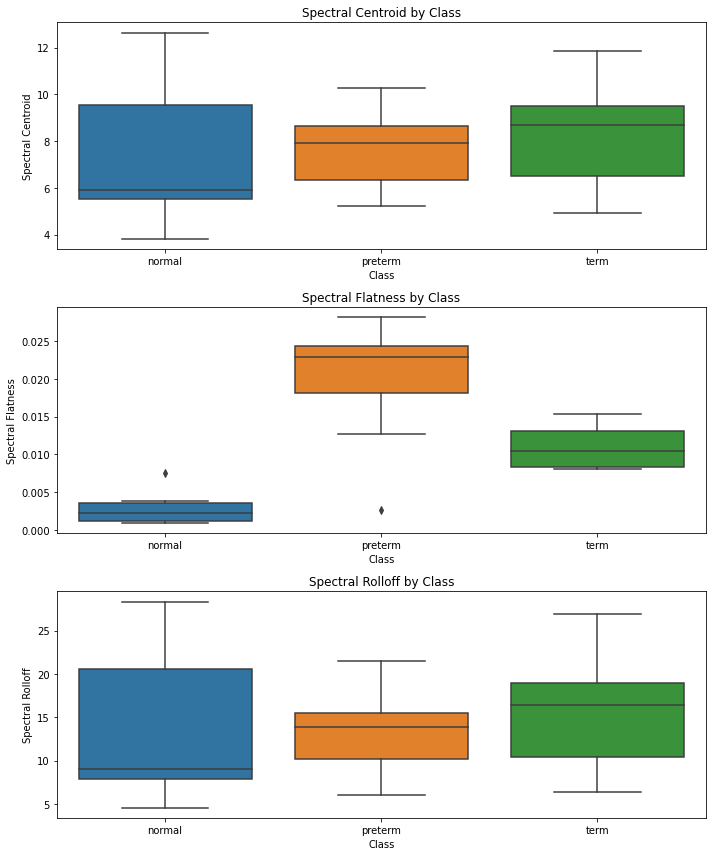

In [5]:
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

# List of record names
record_names = ['tpehgt_n001', 'tpehgt_n002', 'tpehgt_p001', 'tpehgt_p002', 'tpehgt_p003', 'tpehgt_t001', 'tpehgt_t002']
# Corresponding labels for the records
labels = ['normal', 'normal', 'preterm', 'preterm', 'preterm', 'term', 'term']

#  A list to store the features and corresponding labels
spectrogram_features = []
feature_labels = []

# Function to compute spectral features
def compute_spectral_features(Sxx, fs):
    # Spectral centroid
    spectral_centroid = np.mean(np.sum(Sxx * np.arange(Sxx.shape[0])[:, None], axis=0) / np.sum(Sxx, axis=0))

    
    # Spectral flatness
    spectral_flatness = np.mean(np.exp(np.mean(np.log(Sxx + 1e-10), axis=0)) / (np.mean(Sxx, axis=0) + 1e-10))

    # Spectral rolloff
    spectral_rolloff = np.mean(np.argmax(np.cumsum(Sxx, axis=0) >= 0.85 * np.sum(Sxx, axis=0), axis=0))

    return [spectral_centroid, spectral_flatness, spectral_rolloff]


for record_name, label in zip(record_names, labels):
    # Load the data
    signals, fields = wfdb.rdsamp(record_name)
    signal_labels = fields['sig_name']
    for i in [1, 3, 5]:  
        if i < signals.shape[1]:  
            f, t, Sxx = spectrogram(signals[:, i], fs=fields['fs'])
            
            #Features from the spectrogram
            features = compute_spectral_features(Sxx, fields['fs'])
            spectrogram_features.append(features)
            feature_labels.append(label)

# Converting the features list to a numpy array
spectrogram_features = np.array(spectrogram_features)

# Converting feature_labels to a numpy array
feature_labels = np.array(feature_labels)

# A function to plot features
def plot_features(features, labels, feature_names):
    num_features = features.shape[1]
    fig, axes = plt.subplots(num_features, 1, figsize=(10, num_features * 4))
    
    for i in range(num_features):
        sns.boxplot(x=labels, y=features[:, i], ax=axes[i])
        axes[i].set_title(f'{feature_names[i]} by Class')
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel(feature_names[i])
        
    
    plt.tight_layout()
    plt.show()

# Feature names
feature_names = ['Spectral Centroid', 'Spectral Flatness', 'Spectral Rolloff']

# extracted features
plot_features(spectrogram_features, feature_labels, feature_names)


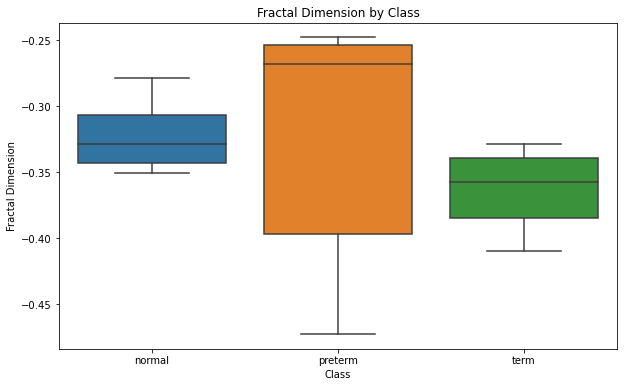

In [4]:
import wfdb
import pywt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to compute fractal dimension using the box-counting method
def fractal_dimension(data):
    # Calculating the number of boxes required to cover the data
    def count_boxes(data, box_size):
        x_min, x_max = np.min(data), np.max(data)
        n_boxes = int((x_max - x_min) / box_size) + 1
        return n_boxes
    
    # fractal dimension using the box-counting method
    box_sizes = np.logspace(-3, np.log10(len(data) / 2), num=50, endpoint=False)  
    n_boxes = [count_boxes(data, size) for size in box_sizes]
    log_n_boxes = np.log(n_boxes)
    log_box_sizes = np.log(box_sizes)
    
    # Fitting a line to log(N) vs log(1/size)
    fractal_dimension = np.polyfit(log_box_sizes, log_n_boxes, 1)[0]
    return fractal_dimension

record_names = ['tpehgt_n001', 'tpehgt_n002', 'tpehgt_p001', 'tpehgt_p002', 'tpehgt_p003', 'tpehgt_t001', 'tpehgt_t002']
labels = ['normal', 'normal', 'preterm', 'preterm', 'preterm', 'term', 'term']

fractal_dims = []
feature_labels = []

for record_name, label in zip(record_names, labels):
    # Read the data
    signals, fields = wfdb.rdsamp(record_name)

    signal_labels = fields['sig_name']

    #wavelet decomposition for ehg signals
    for i in [1, 3, 5]:  
        if i < signals.shape[1]: 
            coeffs = pywt.wavedec(signals[:, i], "bior3.3", level=1)  
        
            #fractal dimension for the current signal
            fractal_dim = fractal_dimension(coeffs[0])  
            fractal_dims.append(fractal_dim)
            feature_labels.append(label)

# Convert to numpy arrays for easier manipulation
fractal_dims = np.array(fractal_dims)
feature_labels = np.array(feature_labels)

# Create a DataFrame for visualization
df = pd.DataFrame({'Fractal Dimension': fractal_dims, 'Class': feature_labels})

# Plotting the fractal dimensions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Fractal Dimension', data=df)
plt.title('Fractal Dimension by Class')
plt.xlabel('Class')
plt.ylabel('Fractal Dimension')



plt.show()


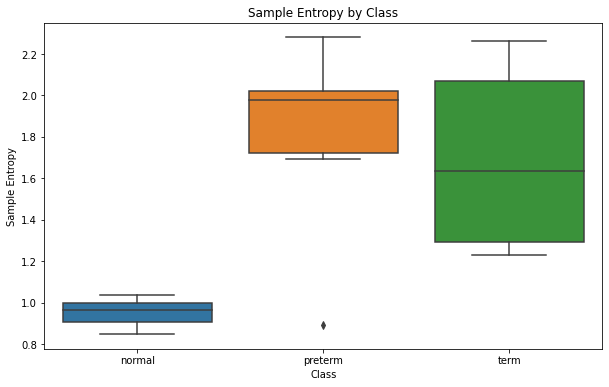

In [19]:
import numpy as np
import pywt
import wfdb
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute sample entropy
def sampen(data, m, r):
    N = len(data)
    B = 0.0
    A = 0.0

    # Split time series of length m
    xmi = np.array([data[i : i + m] for i in range(N - m)])
    xmj = np.array([data[i : i + m] for i in range(N - m + 1)])

    # Count matches for m
    for i in range(len(xmi)):
        B += np.sum(np.abs(xmi[i] - xmj).max(axis=1) <= r) - 1

    # Count matches for m + 1
    m += 1
    xm = np.array([data[i : i + m] for i in range(N - m + 1)])
    for i in range(len(xm) - 1):
        A += np.sum(np.abs(xm[i] - xm[:-1]).max(axis=1) <= r) - 1

    # Return sample entropy
    return -np.log(A / B)

record_names = ['tpehgt_n001', 'tpehgt_n002', 'tpehgt_p001', 'tpehgt_p002', 'tpehgt_p003', 'tpehgt_t001', 'tpehgt_t002']
labels = ['normal', 'normal', 'preterm', 'preterm', 'preterm', 'term', 'term']

sample_entropies = []
feature_labels = []

for record_name, label in zip(record_names, labels):
    # Read the data
    signals, fields = wfdb.rdsamp(record_name)

    signal_labels = fields['sig_name']

    # Compute wavelet decomposition for ehg signal
    for i in [1, 3, 5]:  
        if i < signals.shape[1]: 
            coeffs = pywt.wavedec(signals[:, i], "bior3.3", level=1)
            
            # Sample entropy calculation
            data = coeffs[1]
            m = 2
            r = 0.25 * np.std(data)
            sample_entropy = sampen(data, m, r)
            sample_entropies.append(sample_entropy)
            feature_labels.append(label)

# Convert to numpy arrays for easier manipulation
sample_entropies = np.array(sample_entropies)
feature_labels = np.array(feature_labels)

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame({'Sample Entropy': sample_entropies, 'Class': feature_labels})

# Plot the sample entropies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Sample Entropy', data=df)
plt.title('Sample Entropy by Class')
plt.xlabel('Class' )
plt.ylabel('Sample Entropy' )



plt.show()
